In [1]:
!pip install torchtext
!pip install torchaudio
!pip install fastai

!pip uninstall torch -y
!pip uninstall torchvision -y
!pip install torch
!pip install torchvision

# If something breaks in the notebook it is probably related to a mismatch between the Python version, CUDA or torch
import torch
pytorch_version = f"torch-{torch.__version__}.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: torch 1.13.1+cu116
Uninstalling torch-1.13.1+cu116:
  Successfully uninstalled torch-1.13.1+cu116
Found existing installation: torchvision 0.14.1+cu116
Uninstalling torchvision-0.14.1+cu116:
  Successfully uninstalled torchvision-0.14.1+cu116
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 KB 60.0 MB/s eta 0:00:00
     ━━━

In [2]:
!pip install pygod
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pygod: filename=pygod-0.3.1-py3-none-any.whl size=76492 sha256=c75cd2c77576c0cff66f3bcb774e642d1b180daafa29736b30794e4c864debbc
  Stored in directory: /root/.cache/pip/wheels/01/21/16/7d56f68f9b8fe255f8a59a34c2a232f054491b407c56727bb8
Successfully built pygod
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
%matplotlib inline

import json
import collections
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.data import Data
#from torch_geometric.transforms import AddTrainValTestMask as masking
from torch_geometric.utils.convert import to_networkx
from torch_geometric.nn import GCNConv

import networkx as nx
import seaborn as sns

In [4]:
from operator import itemgetter
import torch
import numpy as np
import torch
from torch_geometric.data import Data

In [5]:

sns.set_style('darkgrid')

nodes=pd.read_csv("https://raw.githubusercontent.com/SriBhanuGundu/Fetch_Data/main/data/Social_Networks/x.csv") #nodes x

edges=pd.read_csv("https://raw.githubusercontent.com/SriBhanuGundu/Fetch_Data/main/data/Social_Networks/edge_index.csv") #edges - edge_index

In [6]:
G = nx.Graph()

for i, index in enumerate(nodes.index.values):
    G.add_node(int(index),node = nodes.loc[i, 'index'])
    
for i, row in edges.iterrows():
    G.add_edge(int(row['index_x']), int(row['index_y']))

In [8]:
from networkx.algorithms.community import greedy_modularity_communities
c_degree = nx.degree_centrality(G)
c_degree = list(c_degree.values())
c = list(greedy_modularity_communities(G))

nb_nodes = len(list(G.nodes()))
nb_edges = len(list(G.edges()))
degrees = list(dict(G.degree()).values())
avg_degree = np.mean(degrees)
median_degree = np.median(degrees)
max_degree = np.max(degrees)        
min_degree = np.min(degrees) 
avg_centrality = np.mean(c_degree) 
min_centrality = np.min(c_degree) 
max_centrality = np.max(c_degree) 
median_centrality = np.median(c_degree) 
print("Number of nodes: ", nb_nodes)
print("Number of edges: ", nb_edges)
print("Average degree: ", avg_degree)
print("Median degree: ", median_degree)
print("Max degree: ", max_degree)
print("Min degree: ", min_degree)
print("Average centrality: ", avg_centrality)
print("Median centrality: ", median_centrality)
print("Max centrality: ", max_centrality)
print("Min centrality: ", min_centrality)

Number of nodes:  19688
Number of edges:  31198
Average degree:  3.1692401462819992
Median degree:  1.0
Max degree:  910
Min degree:  1
Average centrality:  0.0001609813656871031
Median centrality:  5.079494082389394e-05
Max centrality:  0.04622339614974348
Min centrality:  5.079494082389394e-05


In [9]:
print(c)

[frozenset({0, 2, 3, 5, 6, 8200, 9, 8, 10, 16396, 11, 13, 14, 18, 8213, 8214, 21, 22, 25, 27, 8219, 16411, 8222, 30, 8224, 42, 43, 47, 48, 16432, 50, 8240, 8242, 16437, 8248, 16441, 8250, 60, 63, 8257, 65, 74, 75, 8269, 8271, 8274, 83, 8275, 82, 85, 86, 16472, 90, 91, 94, 99, 8292, 8293, 101, 105, 16494, 8303, 110, 111, 16497, 112, 116, 117, 118, 114, 16508, 124, 127, 8321, 132, 8325, 135, 138, 139, 143, 146, 8339, 147, 148, 8358, 8359, 172, 8366, 180, 16568, 185, 8378, 187, 8385, 16579, 8390, 8392, 200, 203, 8400, 209, 16596, 8404, 215, 217, 8411, 219, 221, 222, 224, 233, 8431, 247, 16642, 16643, 16644, 16646, 8456, 8457, 8467, 275, 16662, 8472, 8476, 286, 289, 8487, 301, 302, 303, 8496, 310, 8511, 8514, 16708, 8516, 16711, 329, 8523, 331, 16718, 339, 340, 341, 344, 16728, 16729, 347, 349, 8543, 351, 352, 355, 356, 357, 361, 362, 363, 366, 371, 377, 8569, 380, 384, 385, 388, 8583, 16778, 394, 8586, 8591, 403, 8597, 410, 411, 8609, 16802, 8612, 421, 422, 423, 425, 426, 8621, 431, 8623,

In [10]:
print(len(c))

469


From degree centrality, it is clear evident that shows the nodes that are well connected. which means 469 nodes are well connected.

In [ ]:
nx.density(G)

0.0001609813656871031

In [ ]:
nx.is_connected(G)

False

In [ ]:
components = nx.connected_components(G)
largest_component = max(components, key=len)
print("There are" , len(largest_component), "large components.")

components = nx.connected_components(G)
smallest_component = min(components, key=len)
print("There are" , len(smallest_component), "small components, which are", list(smallest_component))


There are 18769 large components.
There are 14 small components, which are [14752, 14628, 9127, 16264, 15658, 17324, 17997, 15340, 13775, 15375, 16949, 15254, 8792, 9147]


In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

{'group': 6, 'nodesize': 649.16, 'degree': 12}
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by degree:")
for d in sorted_degree[:10]:
    print(d)

Top 10 nodes by degree:
(1, 910)
(180, 210)
(1498, 183)
(545, 169)
(1617, 158)
(577, 155)
(4944, 139)
(3978, 136)
(618, 132)
(13, 129)


These are top 10 nodes connected from degree centrality.

## Own Neural network analysis by training and testing the model.

In [ ]:
nodes_sndf = pd.DataFrame(nodes['index'])
y_sndf = pd.DataFrame(nodes['LABEL'])

In [ ]:
edges_sndf = pd.DataFrame(edges[['index_x', 'index_y']])


In [ ]:

edge_idx = torch.tensor(edges_sndf.to_numpy().transpose(), dtype=torch.long)
map_dict = {v.item():i for i,v in enumerate(torch.unique(edge_idx))}
map_edge = torch.zeros_like(edge_idx)
for k,v in map_dict.items():
    map_edge[edge_idx==k] = v
map_dict, map_edge, map_edge.shape


attrs = torch.tensor(nodes_sndf.to_numpy(), dtype=torch.float)
pad = torch.zeros((attrs.shape[0], 4), dtype=torch.float)
x = torch.cat((attrs, pad), dim=-1)

edge_idx = map_edge.long()

label = y_sndf.loc[0:19688]
np_lab = y_sndf.to_numpy() #label.to_numpy()
y = torch.tensor(np_lab , dtype=torch.long) #if np_lab[0] == 1 else [0]
y = torch.tensor(y_sndf.LABEL.values, dtype=torch.long)
data = Data(x=x, edge_index=edge_idx, y=y)
data

Data(x=[19688, 5], edge_index=[2, 31198], y=[19688])

In [ ]:
class SocialGNN(torch.nn.Module):
    def __init__(self,num_of_feat,f):
        super(SocialGNN, self).__init__()
        self.conv1 = GCNConv(num_of_feat, f)
        self.conv2 = GCNConv(f, 2)
    def forward(self, data):
        x = data.x.float()
        edge_index =  data.edge_index
        x = self.conv1(x=x, edge_index=edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

In [ ]:
def masked_loss(predictions,labels,mask):
    mask=mask.float()
    mask=mask/torch.mean(mask)
    loss=criterion(predictions,labels)
    loss=loss*mask
    loss=torch.mean(loss)
    return (loss)    
def masked_accuracy(predictions,labels,mask):
    mask=mask.float()
    mask/=torch.mean(mask)
    accuracy=(torch.argmax(predictions,axis=1)==labels).long()
    accuracy=mask*accuracy
    accuracy=torch.mean(accuracy)
    return (accuracy)

In [ ]:
from typing import Union

import torch


class AddTrainValTestMask(object):
    r"""Adds a node-level random split via :obj:`train_mask`, :obj:`val_mask`
    and :obj:`test_mask` attributes to the :obj:`data` object.

    Args:
        split (string): The type of dataset split (:obj:`"train_rest"`,
            :obj:`"test_rest"`, :obj:`"random"`).
            If set to :obj:`"train_rest"`, all nodes except those in the
            validation and test sets will be used for training (as in the
            `"FastGCN: Fast Learning with Graph Convolutional Networks via
            Importance Sampling" <https://arxiv.org/abs/1801.10247>`_ paper).
            If set to :obj:`"test_rest"`, all nodes except those in the
            training and validation sets will be used for test (as in the
            `"Pitfalls of Graph Neural Network Evaluation"
            <https://arxiv.org/abs/1811.05868>`_ paper).
            If set to :obj:`"random"`, train, validation, and test sets will be
            randomly generated, according to :obj:`num_train_per_class`,
            :obj:`num_val` and :obj:`num_test` (as in the `"Semi-supervised
            Classification with Graph Convolutional Networks"
            <https://arxiv.org/abs/1609.02907>`_ paper).
        num_splits (int, optional): The number of splits to add. If bigger
            than :obj:`1`, the shape of masks will be
            :obj:`[num_nodes, num_splits]`, and :obj:`[num_nodes]` otherwise.
            (default: :obj:`1`)
        num_train_per_class (int, optional): The number of training samples
            per class in case of :obj:`"test_rest"` and :obj:`"random"` split.
            (default: :obj:`20`)
        num_val (int or float, optional): The number of validation samples.
            If float, it represents the ratio of samples to include in the
            validation set. (default: :obj:`500`)
        num_test (int or float, optional): The number of test samples in case
            of :obj:`"train_rest"` and :obj:`"random"` split. If float, it
            represents the ratio of samples to include in the test set.
            (default: :obj:`1000`)
    """
    def __init__(
        self,
        split: str,
        num_splits: int = 1,
        num_train_per_class: int = 20,
        num_val: Union[int, float] = 500,
        num_test: Union[int, float] = 1000,
    ):
        assert split in ['train_rest', 'test_rest', 'random']
        self.split = split
        self.num_splits = num_splits
        self.num_train_per_class = num_train_per_class
        self.num_val = num_val
        self.num_test = num_test

    def __call__(self, data):
        train_masks, val_masks, test_masks = [], [], []
        for _ in range(self.num_splits):
            train_mask, val_mask, test_mask = self.__sample_split__(data)
            train_masks.append(train_mask)
            val_masks.append(val_mask)
            test_masks.append(test_mask)

        data.train_mask = torch.stack(train_masks, dim=-1).squeeze(-1)
        data.val_mask = torch.stack(val_masks, dim=-1).squeeze(-1)
        data.test_mask = torch.stack(test_masks, dim=-1).squeeze(-1)

        return data

    def __sample_split__(self, data):
        train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
        val_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
        test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)

        if isinstance(self.num_val, float):
            num_val = round(data.num_nodes * self.num_val)
        else:
            num_val = self.num_val

        if isinstance(self.num_test, float):
            num_test = round(data.num_nodes * self.num_test)
        else:
            num_test = self.num_test

        if self.split == 'train_rest':
            perm = torch.randperm(data.num_nodes)
            val_mask[perm[:num_val]] = True
            test_mask[perm[num_val:num_val + num_test]] = True
            train_mask[perm[num_val + num_test:]] = True

        else:
            num_classes = int(data.y.max().item()) + 1
            for c in range(num_classes):
                idx = (data.y == c).nonzero(as_tuple=False).view(-1)
                idx = idx[torch.randperm(idx.size(0))]
                idx = idx[:self.num_train_per_class]
                train_mask[idx] = True

            remaining = (~train_mask).nonzero(as_tuple=False).view(-1)
            remaining = remaining[torch.randperm(remaining.size(0))]

            val_mask[remaining[:num_val]] = True

            if self.split == 'test_rest':
                test_mask[remaining[num_val:]] = True
            elif self.split == 'random':
                test_mask[remaining[num_val:num_val + num_test]] = True

        return train_mask, val_mask, test_mask

    def __repr__(self):
        return '{}(split={})'.format(self.__class__.__name__, self.split)

In [ ]:
from torch_geometric.data import Data
#from torch_geometric.transforms import AddTrainValTestMask as masking
from torch_geometric.utils.convert import to_networkx
from torch_geometric.nn import GCNConv
msk=AddTrainValTestMask(split="train_rest", num_splits = 1, num_val = 0.3, num_test= 0.6)
g=msk(data)

In [ ]:
print(g)
print()
print("training samples",torch.sum(g.train_mask).item())
print("validation samples",torch.sum(g.val_mask ).item())
print("test samples",torch.sum(g.test_mask ).item())

Data(x=[19688, 5], edge_index=[2, 31198], y=[19688], train_mask=[19688], val_mask=[19688], test_mask=[19688])

training samples 1969
validation samples 5906
test samples 11813


In [ ]:
def train_social(net,data,epochs=10,lr=0.01):
    optimizer = torch.optim.Adam(net.parameters(), lr=lr) # 00001
    best_accuracy=0.0
    train_losses=[]
    train_accuracies=[]
    val_losses=[]
    val_accuracies=[]
    test_losses=[]
    test_accuracies=[]
    for ep in range(epochs+1):
        optimizer.zero_grad()
        out=net(data)
        #print(out)
        loss=masked_loss(predictions=out,
                         labels=data.y,
                         mask=data.train_mask)
       
        loss.backward()
        optimizer.step()
        train_losses+=[loss]
        
        train_accuracy=masked_accuracy(predictions=out,
                                       labels=data.y, 
                                       mask=data.train_mask)
        
        train_accuracies+=[train_accuracy]
       
        val_loss=masked_loss(predictions=out,
                             labels=data.y, 
                             mask=data.val_mask)
        val_losses+=[val_loss]
        val_accuracy=masked_accuracy(predictions=out,
                                     labels=data.y, 
                                     mask=data.val_mask)
        val_accuracies+=[val_accuracy]
        test_accuracy=masked_accuracy(predictions=out,
                                      labels=data.y, 
                                      mask=data.test_mask)
        test_accuracies+=[test_accuracy]
        print("Epoch {}/{}, Train_Loss: {:.4f}, Train_Accuracy: {:.4f}, Val_Accuracy: {:.4f}, Test_Accuracy: {:.4f}"
                      .format(ep+1,epochs, loss.item(), train_accuracy, val_accuracy,  test_accuracy))
       
    if np.round(val_accuracy,4)> np.round(best_accuracy ,4):
            print("\n \nBest Train_Accuracy: {:.4f},\n Val_Accuracy: {:.4f},\n Test_Accuracy: {:.4f}"
                      .format(train_accuracy, val_accuracy,  test_accuracy))
            best_accuracy=val_accuracy

In [ ]:
num_of_feat=g.num_node_features
net=SocialGNN(num_of_feat=num_of_feat,f=16)
criterion=nn.CrossEntropyLoss()
train_social(net,g,epochs=50,lr=0.1)

Epoch 1/50, Train_Loss: 6455.9609, Train_Accuracy: 0.5317, Val_Accuracy: 0.5185, Test_Accuracy: 0.5158
Epoch 2/50, Train_Loss: 2366.6521, Train_Accuracy: 0.5317, Val_Accuracy: 0.5185, Test_Accuracy: 0.5158
Epoch 3/50, Train_Loss: 560.4592, Train_Accuracy: 0.4683, Val_Accuracy: 0.4815, Test_Accuracy: 0.4842
Epoch 4/50, Train_Loss: 971.5228, Train_Accuracy: 0.4683, Val_Accuracy: 0.4815, Test_Accuracy: 0.4842
Epoch 5/50, Train_Loss: 666.7083, Train_Accuracy: 0.4683, Val_Accuracy: 0.4815, Test_Accuracy: 0.4842
Epoch 6/50, Train_Loss: 391.5231, Train_Accuracy: 0.4683, Val_Accuracy: 0.4815, Test_Accuracy: 0.4842
Epoch 7/50, Train_Loss: 89.6825, Train_Accuracy: 0.4683, Val_Accuracy: 0.4815, Test_Accuracy: 0.4842
Epoch 8/50, Train_Loss: 215.5262, Train_Accuracy: 0.5317, Val_Accuracy: 0.5185, Test_Accuracy: 0.5158
Epoch 9/50, Train_Loss: 336.5487, Train_Accuracy: 0.5317, Val_Accuracy: 0.5185, Test_Accuracy: 0.5158
Epoch 10/50, Train_Loss: 340.8108, Train_Accuracy: 0.5317, Val_Accuracy: 0.5185, 

These are the best accuracies from the model:

Best Train_Accuracy: 0.5317,
 Val_Accuracy: 0.5185,
 Test_Accuracy: 0.5158

In [ ]:
#g = nx.from_numpy_matrix(data)
## compute egeinvector centrality and transform the output to vector
ec = nx.eigenvector_centrality_numpy(G, weight="weight")
print(ec)
eigenvector_centralities = np.array([ec[g] for g in ec])
eigenvector_centralities

{0: 0.007769817834143033, 1: 0.23666162460413154, 2: 0.006561057103037192, 3: 0.006561057103037189, 4: 0.00016432726648755124, 5: 0.002345727431922881, 6: 0.015561143695241612, 7: 0.000552037163364315, 8: 0.0049723380166072206, 9: 0.010192631367172687, 10: 0.01132945444885742, 11: 0.011329454448857417, 12: 7.749874907759778e-05, 13: 0.0637859953822319, 14: 0.06378599538223192, 15: 7.761729183771742e-05, 16: 0.004264443792424196, 17: 7.70671058678077e-05, 18: 0.0004943618173630564, 19: 0.0010515706212163186, 20: 7.70922103753436e-05, 21: 0.015386250041687324, 22: 0.0004943618173630566, 23: 0.004281119722219477, 24: 7.730695729257501e-05, 25: 0.01847431996647531, 26: 7.701735174940479e-05, 27: 0.00040412686396084366, 28: 7.742276812686582e-05, 29: 0.0008249047495082389, 30: 0.0016618518845194455, 31: 7.691682150710444e-05, 32: 7.6916821507103e-05, 33: -1.729192856797713e-18, 34: 0.00015319360061987137, 35: 7.916343990296987e-05, 36: 0.001975397913484451, 37: 0.00014891627419846002, 38: 7

array([7.76981783e-03, 2.36661625e-01, 6.56105710e-03, ...,
       7.73694433e-05, 7.71424685e-05, 8.40408795e-05])

In [ ]:
bet_centrality = nx.betweenness_centrality(G, normalized = True, 
                                              endpoints = False)

In [ ]:
bet_centrality

{0: 0.00012071128526217238,
 1: 0.8854012057240543,
 2: 0.0001339489390113198,
 3: 0.0001339489390113198,
 4: 0.0,
 5: 4.000398569470449e-11,
 6: 3.6074267312887294e-05,
 7: 9.382753008394325e-11,
 8: 1.0027253941288581e-07,
 9: 1.0122044678259943e-05,
 10: 0.0004487684798207499,
 11: 0.0004487684798207499,
 12: 0.0,
 13: 0.002767918704417411,
 14: 0.002767918704417411,
 15: 0.0,
 16: 0.0004841852405569287,
 17: 0.0,
 18: 8.459859269863736e-11,
 19: 1.110309583856663e-06,
 20: 0.0,
 21: 0.0019690330365035604,
 22: 8.459859269863736e-11,
 23: 0.0015003859471128527,
 24: 0.0,
 25: 4.52862033993381e-05,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 8.54748672732578e-07,
 30: 2.974480822409161e-10,
 31: 0.0,
 32: 0.0,
 33: 1.4243019066742588e-06,
 34: 0.0,
 35: 0.0,
 36: 6.629752801917522e-06,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 5.1165203969002525e-05,
 43: 0.0,
 44: 0.0026130676263034936,
 45: 0.0,
 46: 0.0,
 47: 0.0005511250317287026,
 48: 0.0005511250317287026,
 49: 0.0,
 50: 0.

It identifies the flow in a network that controls.

In [ ]:

# Assign each to an attribute in your network
nx.set_node_attributes(G, bet_centrality, 'betweenness')
nx.set_node_attributes(G, eigenvector_centralities, 'eigenvector')
sorted_betweenness = sorted(bet_centrality.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by betweenness centrality:")
for b in sorted_betweenness[:10]:
    print(b[0],"%.4f" % b[1])

Top 10 nodes by betweenness centrality:
1 0.8854
8478 0.0105
10223 0.0087
16045 0.0086
427 0.0086
7873 0.0085
16292 0.0076
437 0.0075
15506 0.0070
10080 0.0069


These are the top 10 nodes that controls the flow in the network.

In [ ]:
closeness_dict = nx.closeness_centrality(G)

In [ ]:
closeness_dict

{0: 0.2429677131142081,
 1: 0.47432198048877733,
 2: 0.31759264814713806,
 3: 0.31759264814713806,
 4: 0.23877514848151887,
 5: 0.19815378186589402,
 6: 0.24189683534127182,
 7: 0.24015327677132384,
 8: 0.24438479246595052,
 9: 0.23991176134756254,
 10: 0.24884768113627687,
 11: 0.24884768113627687,
 12: 0.23795900232769648,
 13: 0.24952790575034753,
 14: 0.24952790575034753,
 15: 0.2379716622466871,
 16: 0.31679413977154236,
 17: 0.237870420596636,
 18: 0.23919651639060388,
 19: 0.2393405046621252,
 20: 0.23787674567595785,
 21: 0.24993224225092783,
 22: 0.23919651639060388,
 23: 0.3169175893796438,
 24: 0.2378893968437751,
 25: 0.24347026584317183,
 26: 0.23785144737669556,
 27: 0.2385522976189591,
 28: 0.23791470321685532,
 29: 0.23895692054780862,
 30: 0.24008882512569668,
 31: 0.23783247718322945,
 32: 0.23783247718322945,
 33: 0.0012190785797734545,
 34: 0.23856820174163196,
 35: 0.2380381489279066,
 36: 0.24070899268151716,
 37: 0.23826955861577515,
 38: 0.2378957229323242,
 39:

In [ ]:
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)
for b in sorted_closeness[:10]:
    print(b[0],"%.4f" % b[1])

1 0.4743
2505 0.3197
2506 0.3197
2621 0.3193
2622 0.3193
4209 0.3193
4210 0.3193
422 0.3190
423 0.3190
2151 0.3190


These are the best nodes to identify the best placed in the network.

In [ ]:
# Read Our Edgelist
edges_graph = nx.from_pandas_edgelist(edges,source="index_x",target="index_y")

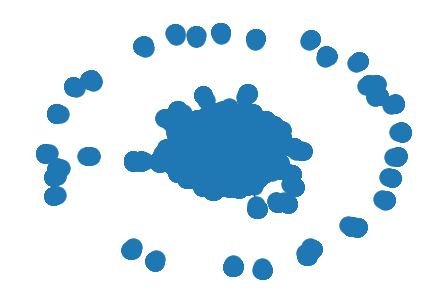

In [ ]:
nx.draw(edges_graph)

Text(0.5, 1.0, 'Degree distribution')

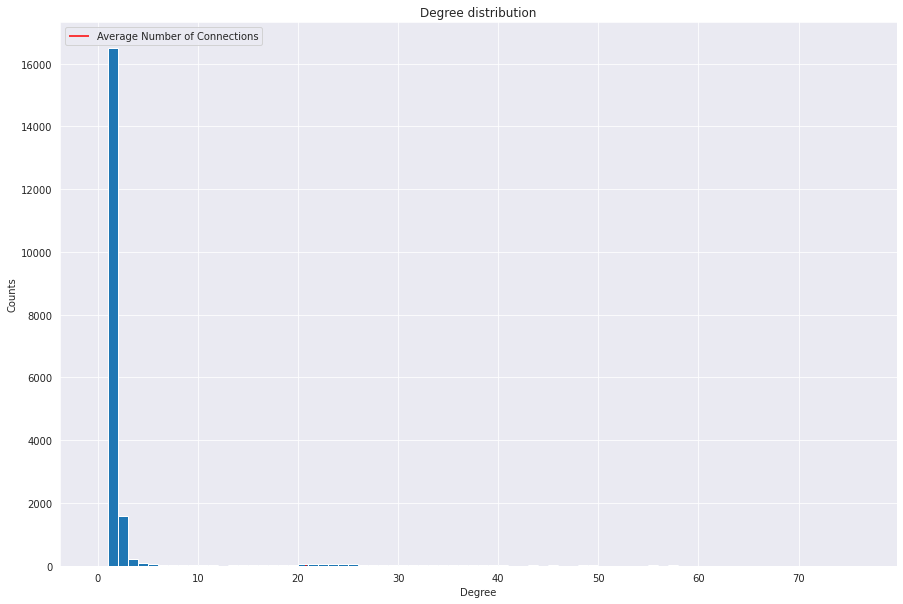

In [ ]:
# On average each mafioso has 21 connections within the extended group, but six have fifty or more connections

fig, ax = plt.subplots(figsize = (15,10))
plt.hist([list(dict(G.degree()).values())],
         bins = np.linspace(0, 76, 77), stacked = False)
plt.vlines(20.7564, 0, 15, color = 'red')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.legend(['Average Number of Connections'], prop={'size': 10},
           loc='upper left')
plt.title('Degree distribution')


<AxesSubplot:ylabel='Frequency'>

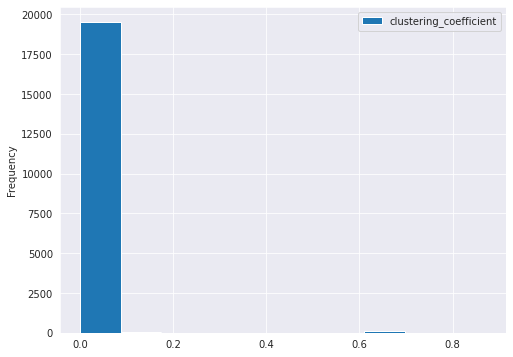

In [ ]:
# form dataframe out of the clustering coefficients 
#visualise the distribution of the clustering coefficients
#most nodes have a high clustering coefficient
#it would be interesting to look at the few guys with the lower clustering coefficients

clustering = nx.clustering(G)
clustering_df = pd.DataFrame(clustering, columns = clustering.keys(), index = range(1))
clustering_df = clustering_df.T.rename(columns = {0: 'clustering_coefficient'})
fig, ax = plt.subplots(figsize = (8, 6))
clustering_df.plot(kind = 'hist', ax = ax)


<AxesSubplot:ylabel='Frequency'>

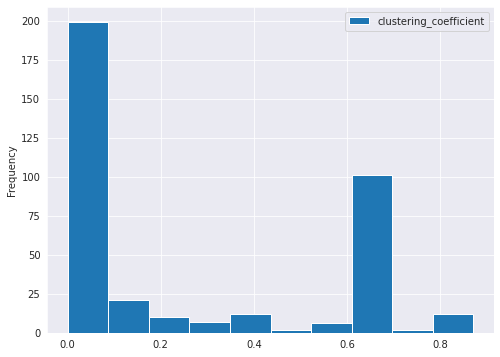

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
clustering_df.query('clustering_coefficient > 0').plot(kind = 'hist', ax = ax)